# Community Detection

In this notebook, we will use the `igraph` library to perform community detection on the Zachary Karate Club network. 
I decided to use `igraph` because it has a built-in function for community detection, and it is the library used in the paper of Pirrò et al. (2021).

I decided to import the **Zachary Karate Club** network from the `Pytorch Geometric` library, because in the future I will use this library to perform graph neural network experiments. But there isn't a built-in function for community detection in `Pytorch Geometric`, and neither a built-in function to convert a `Pytorch Geometric` graph to an `igraph` graph, for this reason I need first to convert the `Pytorch Geometric` graph to a `NetworkX` graph, and then to an igraph graph. 

In [1]:
import torch

from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx, from_networkx

from igraph import Graph
import igraph as ig

import networkx as nx
import scipy as sp
import scipy.io  # for mmread() and mmwrite()

import matplotlib.pyplot as plt
plt.style.use('default')


In [10]:
def import_mtx_graph(file_path: str) -> nx.Graph:
    """
    Import a graph from a .mtx file

    Parameters
    ----------
    file_path : str
        File path of the .mtx file

    Returns
    -------
    nx.Graph
        Graph imported from the .mtx file
    """
    try:
        graph_matrix = scipy.io.mmread(file_path)
        graph = nx.Graph(graph_matrix)
        return graph
    except Exception as e:
        print("Error: ", e)
        return None

Import the karate club network graph.

In [11]:
# Folder containing the datasets
FOLDER_PATH = "../dataset/data/"
# Import graph using iGraph
# G = Graph.Famous('Zachary')

# Import dataset using PyG
# dataset = KarateClub()

# Import graph 
PATH = FOLDER_PATH + "kar.mtx"
# PATH = FOLDER_PATH + "dol.mtx"
graph = import_mtx_graph(PATH)


In [12]:
# Print information
# print(dataset)
# print('------------')
# print(f'Number of graphs: {len(dataset)}')
# print(f'Number of features: {dataset.num_features}')
# print(f'Number of classes: {dataset.num_classes}')

print("Nodes: ", nx.nodes(graph))
print("Edges: ", nx.edges(graph))

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [9]:
# Get the first graph from the dataset (Karate Club only contains one graph)
# data = dataset[0]

# print(f'Edges are directed: {data.is_directed()}')
# print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
# print(f'Graph has loops: {data.has_self_loops()}')

In [10]:
# Convert PyG data to NetworkX graph and visualize it
# graph = to_networkx(data, to_undirected=True)
# plt.figure(figsize=(12, 12))
# plt.axis('off')
# nx.draw_networkx(graph,
#                  pos=nx.spring_layout(graph, seed=0),
#                  with_labels=True,
#                  node_size=800,
#                  node_color=data.y,
#                  cmap="hsv",
#                  vmin=-2,
#                  vmax=3,
#                  width=0.8,
#                  edge_color="grey",
#                  font_size=14
#                  )
# plt.show()


In [13]:
# Convert from NetworkX to iGraph
G = ig.Graph.from_networkx(graph)

In [14]:
from igraph import Graph


def plot_graph(g: Graph) -> plt:
    # fig, ax = plt.subplots(figsize=(10, 10))
    
    plot = ig.plot(
        g,
        mark_groups=True,
        vertex_size=20,
        edge_color='black',
        vertex_label=[v.index for v in G.vs],
        bbox=(0, 0, 500, 500),
        # target=ax,
        )
    return plot


/home/andrea/.pyenv/versions/3.10.11/envs/thesis/lib/python3.10/site-packages/igraph/drawing/cairo/plot.py:277: UserWarning: Graph with 34 nodes and 78 edges does not support plotting
  warn("%s does not support plotting" % (obj,))


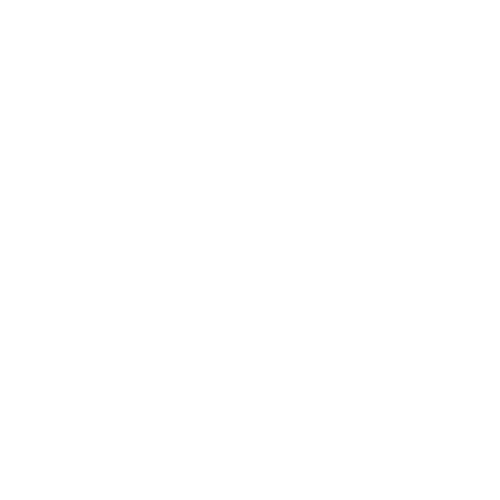

In [15]:
plot_graph(graph)

## Community Detection Algorithm from Pirrò Paper

1. **Louvain** (`louv`): a multi-level modularity optimization algorithm, which runs in time $O(\vert V \vert log \vert V \vert)$;
2. **WalkTrap** (`walk`): based on the idea that random walks are more likely to stay in the same community. This algorithm runs in time $O(\vert V \vert^2 log \vert V \vert)$;
3. **Greedy** (`gre`): based on a greedy modularity maximization strategy and running in time $O(\vert V \vert log^2 \vert V \vert )$;
4. **InfoMap** (`inf`): it returns a community structure, which provides the shortest description length for a random walk. This algorithm runs in time O(jEj);
5. **Label propagation** (`lab`): it assigns to every node one of k labels and then re-assigns labels to nodes in a way that each node takes the most frequent label of its neighbors. This algorithm runs in time $O(\vert E \vert)$;
6. **Leading Eigenvectors** (`eig`): a top-down hierarchical approach based on modularity. Its complexity is $O( \vert V \vert (\vert E \vert + \vert V \vert))$, or $O(\vert V \vert^2 )$ on a sparse graph;
7. **Edge-Betweeness** (`btw`): a hierarchical decomposition process where edges are removed in the decreasing order of their edge betweenness scores. This algorithm runs in time $O(\vert E \vert^2 \vert V \vert)$;
8. **SpinGlass** (`spin`): it reduces community detection to the problem of finding the ground state of an infinite spin glass. The complexity is $O(V^{3.2} )$;
9. **Optimal** (`opt`): it uses integer programming and has exponential complexity.
10. **Scalable Community Detection** (`scd`), which partitions the graph by maximizing the Weighted Community Clustering, a community detection metric based on triangle analysis. The time complexity is $O(\vert E \vert log \vert V \vert )$.

In [16]:
from igraph import VertexClustering
from typing import List

def vertexcluster_to_list(cluster: VertexClustering) -> List[List[int]]:
    """
    Convert igraph.VertexClustering object to list of list of vertices in each cluster

    Parameters
    ----------
    cluster : VertexClustering
        cluster from igraph community detection algorithm

    Returns
    -------
    List[List[int]]
        list of list of vertices in each cluster
    """
    return [c for c in cluster]

### Louvain

Clustering with 34 elements and 4 clusters
[0] 0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33
[3] 23, 24, 25, 27, 28, 31
------------------
List of communities
[[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [23, 24, 25, 27, 28, 31]]
------------------
Graph Plot


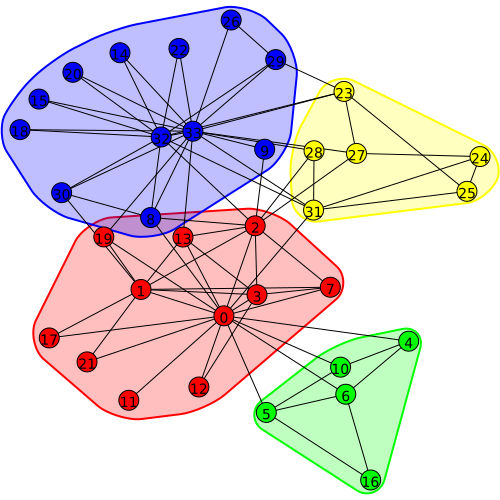

In [17]:
# 1. louv
louv = G.community_leiden(objective_function='modularity')
# louv = louv.as_clustering()

print(louv)
print("------------------")

print("List of communities")
# Convert to list
louv_list = vertexcluster_to_list(louv)
print(louv_list)
print("------------------")

print("Graph Plot")
plot_graph(louv)

### WalkTrap

Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 17, 19, 21
[1] 2, 8, 9, 13, 28, 30, 31
[2] 4, 5, 6, 10, 16
[3] 14, 15, 18, 20, 22, 26, 29, 32, 33
[4] 23, 24, 25, 27
------------------
List of communities
[[0, 1, 3, 7, 11, 12, 17, 19, 21], [2, 8, 9, 13, 28, 30, 31], [4, 5, 6, 10, 16], [14, 15, 18, 20, 22, 26, 29, 32, 33], [23, 24, 25, 27]]
------------------
Graph Plot


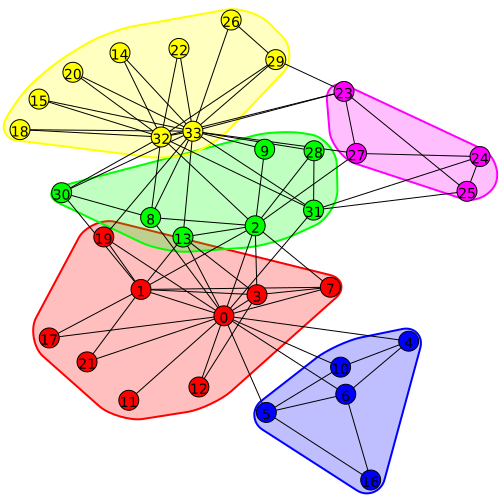

In [18]:
# 2. walk
walk = G.community_walktrap()
walk = walk.as_clustering()

print(walk)
print("------------------")

print("List of communities")
# Convert to list
walk_list = vertexcluster_to_list(walk)
print(walk_list)
print("------------------")

print("Graph Plot")
plot_graph(walk)

### Greedy

Clustering with 62 elements and 4 clusters
[0] 0, 2, 10, 12, 14, 16, 20, 33, 34, 37, 38, 40, 42, 43, 44, 46, 47, 49, 50,
    52, 53, 58, 61
[1] 1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 28, 30, 31, 32, 41, 48, 54, 56,
    57, 60
[2] 3, 4, 8, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55, 59
[3] 36, 39
------------------
List of communities
[[0, 2, 10, 12, 14, 16, 20, 33, 34, 37, 38, 40, 42, 43, 44, 46, 47, 49, 50, 52, 53, 58, 61], [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 28, 30, 31, 32, 41, 48, 54, 56, 57, 60], [3, 4, 8, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55, 59], [36, 39]]
------------------
Graph Plot


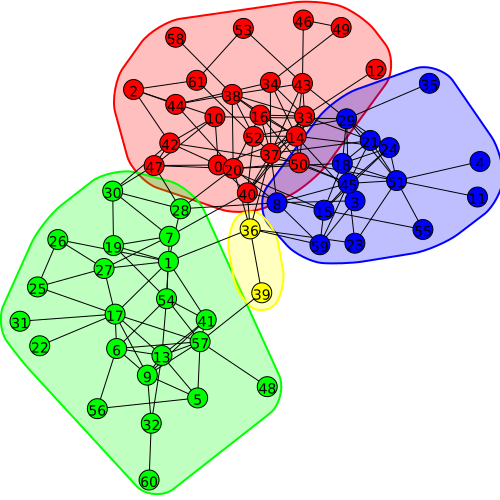

In [17]:
# 3. gre
gre = G.community_fastgreedy()
gre = gre.as_clustering()

print(gre)
print("------------------")

print("List of communities")
# Convert to list
gre_list = vertexcluster_to_list(gre)
print(gre_list)
print("------------------")

print("Graph Plot")
plot_graph(gre)

### InfoMap

Clustering with 62 elements and 5 clusters
[0] 0, 2, 10, 28, 30, 42, 47
[1] 1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 41, 48, 54, 56, 57, 60
[2] 3, 8, 36, 39, 59
[3] 4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55
[4] 12, 14, 16, 20, 33, 34, 37, 38, 40, 43, 44, 46, 49, 50, 52, 53, 58, 61
------------------
List of communities
[[0, 2, 10, 28, 30, 42, 47], [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 41, 48, 54, 56, 57, 60], [3, 8, 36, 39, 59], [4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55], [12, 14, 16, 20, 33, 34, 37, 38, 40, 43, 44, 46, 49, 50, 52, 53, 58, 61]]
------------------
Graph Plot


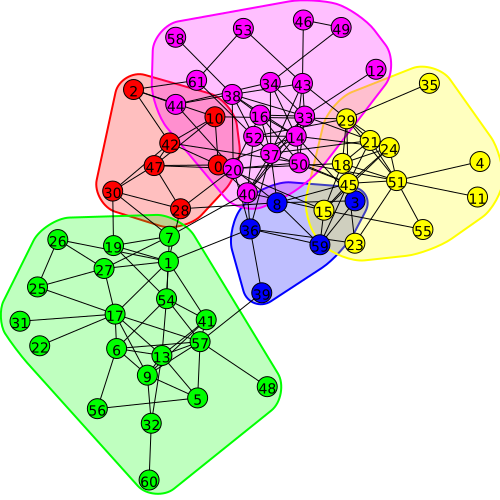

In [18]:
# 4. inf
inf = G.community_infomap()
# clust = inf.as_clustering()

print(inf)
print("------------------")

print("List of communities")
# Convert to list
inf_list = vertexcluster_to_list(inf)
print(inf_list)
print("------------------")

print("Graph Plot")
plot_graph(inf)

### Label Propagation

Clustering with 62 elements and 2 clusters
[0] 0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33,
    34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55,
    58, 59, 61
[1] 1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57,
    60
------------------
List of communities
[[0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61], [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60]]
------------------
Graph Plot


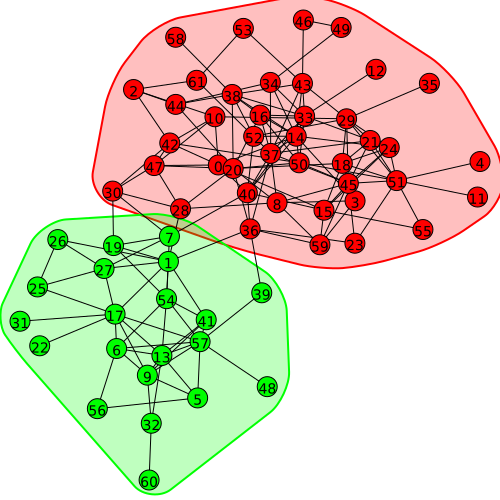

In [19]:
# 5. lab
lab = G.community_label_propagation()
# lab = lab.as_clustering()

print(lab)
print("------------------")

print("List of communities")
# Convert to list
lab_list = vertexcluster_to_list(lab)
print(lab_list)
print("------------------")

print("Graph Plot")
plot_graph(lab)

### Leadin Eigenvector

Clustering with 62 elements and 5 clusters
[0] 0, 2, 10, 20, 42, 44, 47, 61
[1] 1, 7, 19, 25, 26, 27, 28, 30, 54
[2] 3, 4, 8, 11, 15, 18, 21, 23, 24, 29, 35, 36, 37, 45, 51, 55, 59
[3] 12, 14, 16, 33, 34, 38, 40, 43, 46, 49, 50, 52, 53, 58
[4] 5, 6, 9, 13, 17, 22, 31, 32, 39, 41, 48, 56, 57, 60
------------------
List of communities
[[0, 2, 10, 20, 42, 44, 47, 61], [1, 7, 19, 25, 26, 27, 28, 30, 54], [3, 4, 8, 11, 15, 18, 21, 23, 24, 29, 35, 36, 37, 45, 51, 55, 59], [12, 14, 16, 33, 34, 38, 40, 43, 46, 49, 50, 52, 53, 58], [5, 6, 9, 13, 17, 22, 31, 32, 39, 41, 48, 56, 57, 60]]
------------------
Graph Plot


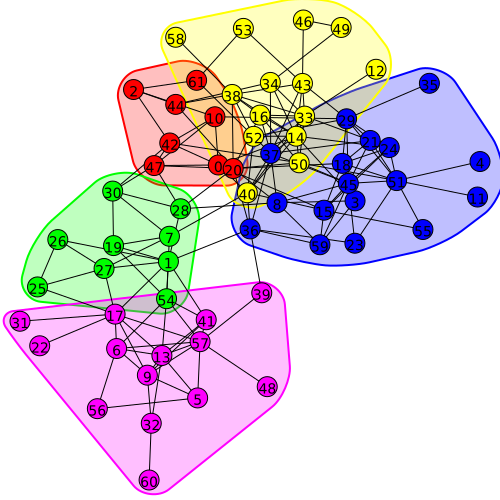

In [20]:
# 6. eig
eig = G.community_leading_eigenvector()
# eig = eig.as_clustering()

print(eig)
print("------------------")

print("List of communities")
# Convert to list
eig_list = vertexcluster_to_list(eig)
print(eig_list)
print("------------------")

print("Graph Plot")
plot_graph(eig)

### Edge-Betweenness

Clustering with 62 elements and 5 clusters
[0] 0, 2, 10, 28, 30, 42, 47
[1] 1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57,
    60
[2] 3, 8, 12, 14, 16, 20, 33, 34, 36, 37, 38, 40, 43, 44, 46, 49, 50, 52, 58,
    59
[3] 4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55
[4] 53, 61
------------------
List of communities
[[0, 2, 10, 28, 30, 42, 47], [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60], [3, 8, 12, 14, 16, 20, 33, 34, 36, 37, 38, 40, 43, 44, 46, 49, 50, 52, 58, 59], [4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55], [53, 61]]
------------------
Graph Plot


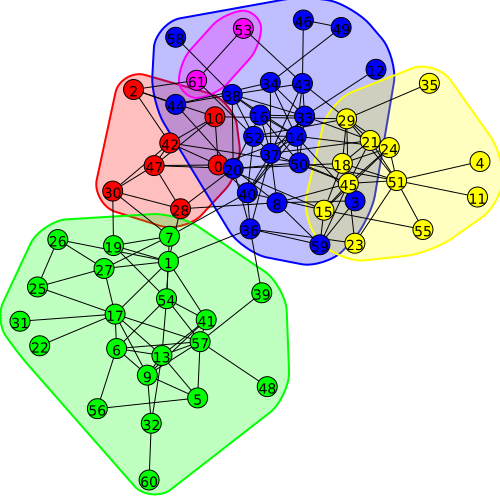

In [21]:
# 7. btw
btw = G.community_edge_betweenness()
btw = btw.as_clustering()

print(btw)
print("------------------")

print("List of communities")
# Convert to list
btw_list = vertexcluster_to_list(btw)
print(btw_list)
print("------------------")

print("Graph Plot")
plot_graph(btw)

### SpinGlass

Clustering with 62 elements and 6 clusters
[0] 3, 8, 36, 39, 59
[1] 1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 41, 54, 56, 57, 60
[2] 0, 2, 10, 28, 30, 42, 47, 53, 61
[3] 4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55
[4] 48
[5] 12, 14, 16, 20, 33, 34, 37, 38, 40, 43, 44, 46, 49, 50, 52, 58
------------------
List of communities
[[3, 8, 36, 39, 59], [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 41, 54, 56, 57, 60], [0, 2, 10, 28, 30, 42, 47, 53, 61], [4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55], [48], [12, 14, 16, 20, 33, 34, 37, 38, 40, 43, 44, 46, 49, 50, 52, 58]]
------------------
Graph Plot


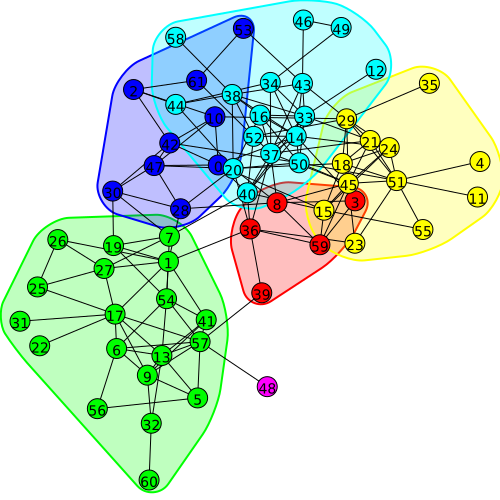

In [22]:
# 8. spin
spin = G.community_spinglass()
# spin = spin.as_clustering()

print(spin)
print("------------------")

print("List of communities")
# Convert to list
spin_list = vertexcluster_to_list(spin)
print(spin_list)
print("------------------")

print("Graph Plot")
plot_graph(spin)

### Optimal Modularity

Clustering with 62 elements and 5 clusters
[0] 0, 2, 10, 20, 28, 30, 42, 44, 47
[1] 1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 41, 48, 54, 56, 57, 60
[2] 3, 8, 36, 39, 59
[3] 4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55
[4] 12, 14, 16, 33, 34, 37, 38, 40, 43, 46, 49, 50, 52, 53, 58, 61
------------------
List of communities
[[0, 2, 10, 20, 28, 30, 42, 44, 47], [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 41, 48, 54, 56, 57, 60], [3, 8, 36, 39, 59], [4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55], [12, 14, 16, 33, 34, 37, 38, 40, 43, 46, 49, 50, 52, 53, 58, 61]]
------------------
Graph Plot


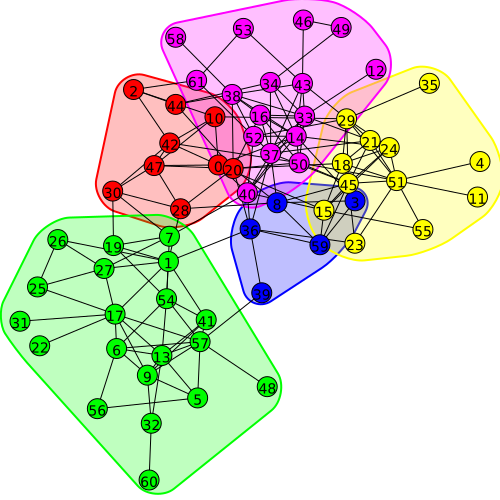

In [23]:
# 9. opt
opt = G.community_optimal_modularity()
# opt = opt.as_clustering()

print(opt)
print("------------------")

print("List of communities")
# Convert to list
opt_list = vertexcluster_to_list(opt)
print(opt_list)
print("------------------")

print("Graph Plot")
plot_graph(opt)

### Scalable Community Detection

In [24]:
# 10. scd
# Not present in igraph library, we need to download it from github repository

This detection algorithm is not present in the iGraph library, for this reason we need to download the library from the github repository and install it in our environment.

We need to define a function that takes a graph and generate text file, where each line is a couple of nodes that are connected by an edge.

In [25]:
def write_graph_to_file(graph: Graph, file_path: str)->None:
    """
    Write the graph to a text file, where each line is an 
    edge in the graph.

    Parameters
    ----------
    graph : Graph
        Graph object to write to file
    file_path : str
        file path of the output file
    """
    with open(file_path, 'w') as file:
        for edge in graph.get_edgelist():
            # To ensure we don't duplicate edges (x, y) and (y, x)
            if edge[0] < edge[1]:
                file.write(f"{edge[0]} {edge[1]}\n")


In [26]:
# Write the graph to a text file
write_graph_to_file(G, "output.txt")

Generate the community file for the given graph using SCD algorithm.

In [27]:
! ./../src/SCD/build/scd -f output.txt

zsh:1: file o directory non esistente: ./../src/SCD/build/scd


In [28]:
def read_data_from_file(file_path:str)->List[List[int]]:
    """
    Read data from file and return a list of lists, where each row list of
    nodes is a community.

    Parameters
    ----------
    file_path : str
        File path to the data file.

    Returns
    -------
    List[List[int]]
        List of lists, where each row list of nodes is a community.
    """
    data_list = []
    with open(file_path, 'r') as file:
        for line in file:
            numbers = [int(num) for num in line.strip().split()]
            data_list.append(numbers)
    return data_list


In [29]:
result_list = read_data_from_file('communities.dat')

# Print the list of lists
print(result_list)

FileNotFoundError: [Errno 2] No such file or directory: 'communities.dat'

In [ ]:
# Determine the total number of nodes
num_nodes = sum(len(cluster) for cluster in result_list)

# Initialize the membership list with -1 for each node
membership_list = [-1] * num_nodes

# Fill in the community numbers in the membership list
for i, cluster in enumerate(result_list):
    for node in cluster:
        membership_list[node] = i

print(membership_list)

[0, 0, 0, 0, 1, 2, 2, 0, 3, 6, 1, 4, 0, 0, 3, 3, 2, 0, 3, 0, 3, 0, 3, 3, 5, 5, 3, 3, 7, 3, 3, 5, 3, 3]


Clustering with 34 elements and 8 clusters
[0] 0, 1, 2, 3, 7, 12, 13, 17, 19, 21
[1] 4, 10
[2] 5, 6, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33
[4] 11
[5] 24, 25, 31
[6] 9
[7] 28
------------------
List of communities
[[0, 1, 2, 3, 7, 12, 13, 17, 19, 21], [4, 10], [5, 6, 16], [8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [11], [24, 25, 31], [9], [28]]
------------------
Graph Plot


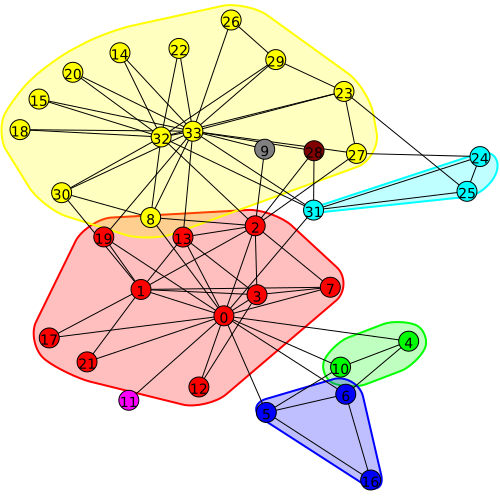

In [ ]:
scd = VertexClustering(G, membership=membership_list)

print(scd)
print("------------------")

print("List of communities")
# Convert to list
scd_list = vertexcluster_to_list(scd)
print(scd_list)
print("------------------")

print("Graph Plot")
plot_graph(scd)
